## Linear Regression

In [12]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

In [86]:
# xs = np.array([1,2,3,4,5,6], dtype=np.float64)
# ys = np.array([5,4,6,5,6,7], dtype=np.float64)

# plt.scatter(xs,ys)
# plt.show()

In [87]:
def create_dataset(hm, varience, step=2, correlation=False):
    
    val = 1
    ys = []
    
    for i in range(hm):
        y = val + random.randrange(-varience, varience)
        ys.append(y)
        
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [121]:
# We can test our assumption using varience. If varience decreases, r-square increases
xs, ys = create_dataset(40, 40, 2, correlation='pos')

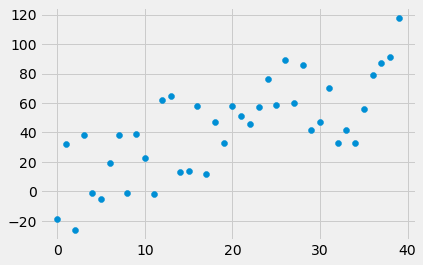

In [122]:
plt.scatter(xs,ys)
plt.show()

In [123]:
def best_fit_slope_and_intercept(xs, ys):
    
    m = ((mean(xs) * mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs**2))
    b = mean(ys) - m * mean(xs)
    
    return m, b

In [124]:
m, b = best_fit_slope_and_intercept(xs, ys)
print(m)
print(b)

2.007786116322701
3.8231707317073287


In [125]:
regression_line = [(m*x)+b for x in xs]
print(regression_line)

[3.8231707317073287, 5.83095684803003, 7.838742964352731, 9.846529080675431, 11.854315196998133, 13.862101313320835, 15.869887429643535, 17.877673545966235, 19.885459662288937, 21.89324577861164, 23.90103189493434, 25.90881801125704, 27.916604127579742, 29.924390243902444, 31.932176360225142, 33.93996247654785, 35.947748592870546, 37.955534709193245, 39.96332082551595, 41.97110694183865, 43.978893058161354, 45.98667917448405, 47.99446529080675, 50.00225140712946, 52.010037523452155, 54.01782363977485, 56.02560975609756, 58.03339587242026, 60.041181988742956, 62.04896810506566, 64.05675422138836, 66.06454033771107, 68.07232645403377, 70.08011257035648, 72.08789868667915, 74.09568480300186, 76.10347091932456, 78.11125703564727, 80.11904315196998, 82.12682926829268]


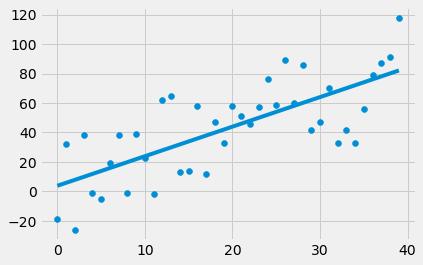

In [126]:
plt.scatter(xs,ys)
plt.plot(regression_line)
plt.show()

In [127]:
predict_x = 8
predict_y = (m*predict_x) + b

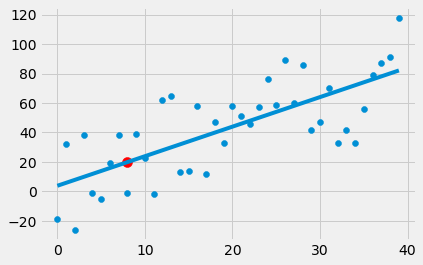

In [128]:
plt.scatter(xs,ys)
plt.plot(regression_line)
plt.scatter(predict_x,predict_y, color='red', s=100)
plt.show()
# This line is good fit line but not the best fit line.

In [129]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)

In [130]:
def coeff_of_determination(ys_orig, ys_line):
#     y_mean_line = [mean(y) for y in ys_orig]
#     y_mean_line = mean(ys_orig)
    y_mean_line = [mean(ys_orig)] * len(ys_orig)
    squared_error_regr = squared_error(ys_orig,ys_line)
    squared_error_regr_y_mean = squared_error(ys_orig,y_mean_line)
    
    return 1 - (squared_error_regr/squared_error_regr_y_mean)

In [131]:
r_squared = coeff_of_determination(ys, regression_line)
print(r_squared)

0.5341272398391228
